In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import njit

In [2]:
@njit
def single_walk(N:int, dim:int, time:int):
    X = np.zeros(shape=(N, dim), dtype=np.int64)
    _vectors = np.concatenate((np.eye(dim, dtype=np.int8), -np.eye(dim, dtype=np.int8)))
    for _ in range(time):
        _vec_idxs = np.empty(N, dtype=np.int8)
        for n in range(N):
            _vec_idxs[n] = np.random.randint(0, 2*dim)
        V = _vectors[_vec_idxs]
        X += V

    return X

In [3]:
import itertools

def pair_walk(N:int, dim:int, time:int):
    X = single_walk(N, dim, time)
    D = []
    for i, j in itertools.combinations(range(N), 2):
        D.append(np.linalg.norm(X[i] - X[j]))
    return D

In [4]:
@njit
def return_walk(N:int, dim:int, max_time:int):
    RET = np.zeros(N, dtype=np.int8)
    _vectors = np.concatenate((np.eye(dim, dtype=np.int8), -np.eye(dim, dtype=np.int8)))
    for n in range(N):
        X = np.zeros(dim, dtype=np.int64)
        for _ in range(max_time):
            _vec_idx = np.random.randint(2*dim)
            V = _vectors[_vec_idx]
            X += V
            if np.all(X == 0):
                RET[n] = 1
                break
    return RET

(0.0, 1.0)

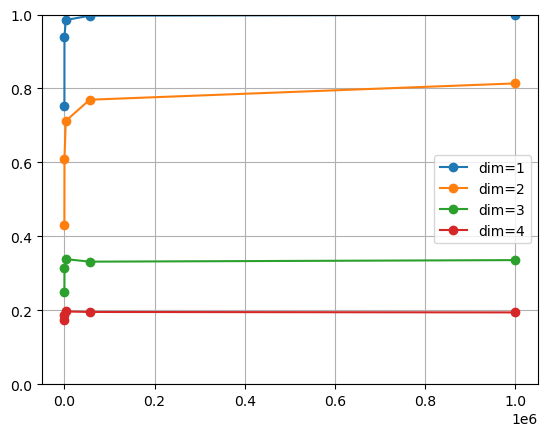

In [11]:
T = np.logspace(1, 6, 5)
for d in range(1, 5):
    RET = []
    for t in T:
        ret = return_walk(10000, d, t)
        RET.append(sum(ret)/len(ret))
    plt.plot(T, RET, 'o-', label=f'dim={d}')

plt.grid()
plt.legend()
plt.ylim(0,1)

In [6]:
RET = return_walk(100, 2, 10**10)
print(RET.sum() / len(RET))

0.87


(array([1.71041195e-05, 2.22353553e-04, 7.35477138e-04, 1.45385016e-03,
        2.61693028e-03, 3.91684336e-03, 5.42200587e-03, 6.72191896e-03,
        6.87585603e-03, 7.76527024e-03, 7.83368672e-03, 7.69685377e-03,
        6.72191896e-03, 6.24300361e-03, 4.66942462e-03, 4.10498867e-03,
        3.48924037e-03, 2.90770031e-03, 1.50516251e-03, 1.28280896e-03,
        1.00914305e-03, 4.78915345e-04, 3.07874151e-04, 2.90770031e-04,
        1.36832956e-04, 1.19728836e-04, 5.13123584e-05, 5.13123584e-05,
        0.00000000e+00, 1.71041195e-05]),
 array([  4.69041576,  16.50161728,  28.3128188 ,  40.12402033,
         51.93522185,  63.74642337,  75.55762489,  87.36882641,
         99.18002794, 110.99122946, 122.80243098, 134.6136325 ,
        146.42483402, 158.23603555, 170.04723707, 181.85843859,
        193.66964011, 205.48084163, 217.29204316, 229.10324468,
        240.9144462 , 252.72564772, 264.53684924, 276.34805077,
        288.15925229, 299.97045381, 311.78165533, 323.59285685,
      

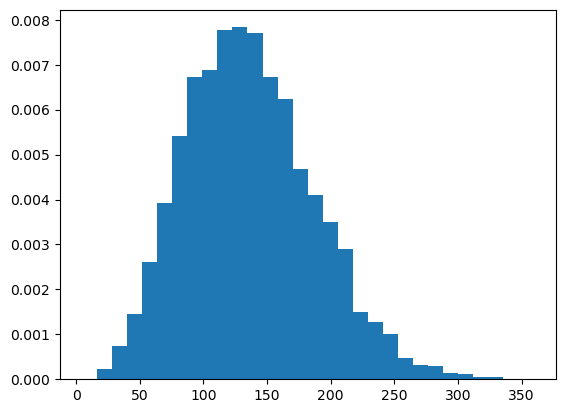

In [18]:
D = pair_walk(100, 4, 10000)
plt.hist(D, bins=30, density=True)


In [13]:
RET = single_walk(10000, 1, 10000)

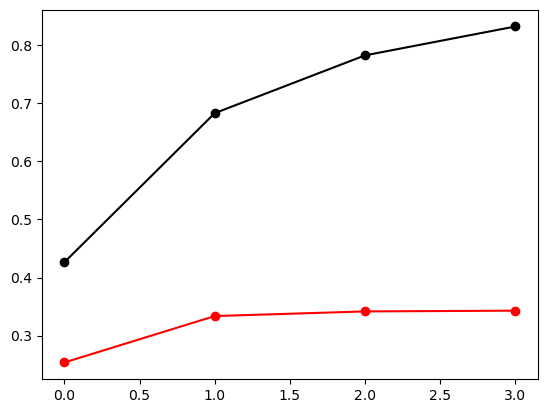

In [36]:
import numpy as np
import matplotlib.pyplot as plt

RET = []
with open('out.txt') as file:
    lines = file.readlines()
    for line in lines:
        lst = []
        values = line.rstrip().split(',')
        for value in values:
            if value:
                lst.append(int(value))
        RET.append(np.array(lst))
RET = np.array(RET)

plt.plot(np.sum(RET, axis=1)/RET.shape[1], 'ok-')

RET = []
with open('out3.txt') as file:
    lines = file.readlines()
    for line in lines:
        lst = []
        values = line.rstrip().split(',')
        for value in values:
            if value:
                lst.append(int(value))
        RET.append(np.array(lst))
RET = np.array(RET)

plt.plot(np.sum(RET, axis=1)/RET.shape[1], 'or-')
        

c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

0     1.000000e+01
1     1.000000e+03
2     1.000000e+05
3     1.000000e+07
4     1.000000e+08
5     1.000000e+09
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
Name: (time, 1), dtype: float64

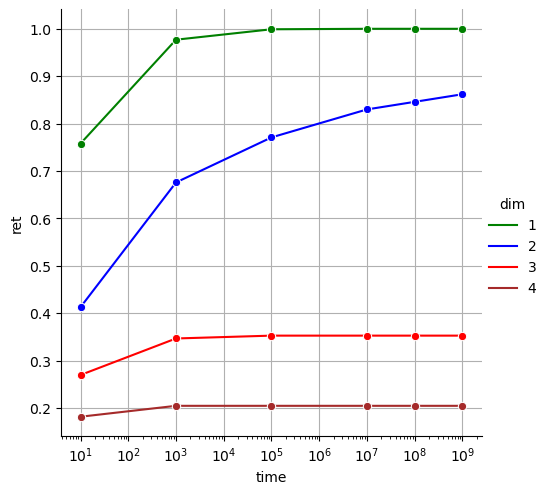

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = True

data = pd.read_csv('out.txt', names=('dim', 'time', 'ret'))
pivot_data = data.pivot(columns='dim')
g = sns.relplot(
    data=data
    , x='time'
    , y='ret'
    , hue='dim'
    , kind='line'
    , marker='o'
    , palette=['green', 'blue', 'red', 'brown'])
g.set(xscale='log')